In [1]:
!pip install yfinance

In [2]:
import seaborn as sns
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
btc=yf.Ticker('BTC-USD')
prices1=btc.history(period='5y')
prices1.drop(columns=['Open','High','Low','Dividends','Stock Splits'],axis=1,inplace=True)

eth=yf.Ticker('ETH-USD')
prices2=btc.history(period='5y')
prices2.drop(columns=['Open','High','Low','Dividends','Stock Splits'],axis=1,inplace=True)

usdt=yf.Ticker('USDT-USD')
prices3=btc.history(period='5y')
prices3.drop(columns=['Open','High','Low','Dividends','Stock Splits'],axis=1,inplace=True)

bnb=yf.Ticker('BNB-USD')
prices4=btc.history(period='5y')
prices4.drop(columns=['Open','High','Low','Dividends','Stock Splits'],axis=1,inplace=True)


In [4]:
p1=prices1.join(prices2,lsuffix=' (BTC)',rsuffix=' (ETH)')
p2=prices3.join(prices4,lsuffix=' (USDT)',rsuffix=' (BNB)')
data=p1.join(p2,lsuffix='_',rsuffix="_")

In [5]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2021-02-01 00:00:00+00:00,33537.175781,61400400660,33537.175781,61400400660,33537.175781,61400400660,33537.175781,61400400660
2021-02-02 00:00:00+00:00,35510.289062,63088585433,35510.289062,63088585433,35510.289062,63088585433,35510.289062,63088585433
2021-02-03 00:00:00+00:00,37472.089844,61166818159,37472.089844,61166818159,37472.089844,61166818159,37472.089844,61166818159
2021-02-04 00:00:00+00:00,36926.066406,68838074392,36926.066406,68838074392,36926.066406,68838074392,36926.066406,68838074392
2021-02-05 00:00:00+00:00,38144.308594,58598066402,38144.308594,58598066402,38144.308594,58598066402,38144.308594,58598066402


In [6]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2026-01-28 00:00:00+00:00,89184.570312,39807419296,89184.570312,39807419296,89184.570312,39807419296,89184.570312,39807419296
2026-01-29 00:00:00+00:00,84561.585938,64653083162,84561.585938,64653083162,84561.585938,64653083162,84561.585938,64653083162
2026-01-30 00:00:00+00:00,84128.656250,72083816087,84128.656250,72083816087,84128.656250,72083816087,84128.656250,72083816087
2026-01-31 00:00:00+00:00,78621.117188,70479259159,78621.117188,70479259159,78621.117188,70479259159,78621.117188,70479259159
2026-02-01 00:00:00+00:00,77952.429688,53712961536,77952.429688,53712961536,77952.429688,53712961536,77952.429688,53712961536


In [7]:
data.shape

(1827, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2021-02-01 00:00:00+00:00 to 2026-02-01 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1827 non-null   float64
 1   Volume (BTC)   1827 non-null   int64  
 2   Close (ETH)    1827 non-null   float64
 3   Volume (ETH)   1827 non-null   int64  
 4   Close (USDT)   1827 non-null   float64
 5   Volume (USDT)  1827 non-null   int64  
 6   Close (BNB)    1827 non-null   float64
 7   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [9]:
data.isnull()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2021-02-01 00:00:00+00:00,False,False,False,False,False,False,False,False
2021-02-02 00:00:00+00:00,False,False,False,False,False,False,False,False
2021-02-03 00:00:00+00:00,False,False,False,False,False,False,False,False
2021-02-04 00:00:00+00:00,False,False,False,False,False,False,False,False
2021-02-05 00:00:00+00:00,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2026-01-28 00:00:00+00:00,False,False,False,False,False,False,False,False
2026-01-29 00:00:00+00:00,False,False,False,False,False,False,False,False
2026-01-30 00:00:00+00:00,False,False,False,False,False,False,False,False


In [10]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,55384.371311,3.669414e+10,55384.371311,3.669414e+10,55384.371311,3.669414e+10,55384.371311,3.669414e+10
std,29708.605341,2.264156e+10,29708.605341,2.264156e+10,29708.605341,2.264156e+10,29708.605341,2.264156e+10
min,15787.284180,5.331173e+09,15787.284180,5.331173e+09,15787.284180,5.331173e+09,15787.284180,5.331173e+09
25%,29412.204102,2.117889e+10,29412.204102,2.117889e+10,29412.204102,2.117889e+10,29412.204102,2.117889e+10
50%,47465.730469,3.166650e+10,47465.730469,3.166650e+10,47465.730469,3.166650e+10,47465.730469,3.166650e+10
75%,71877.632812,4.615681e+10,71877.632812,4.615681e+10,71877.632812,4.615681e+10,71877.632812,4.615681e+10
max,124752.531250,3.509679e+11,124752.531250,3.509679e+11,124752.531250,3.509679e+11,124752.531250,3.509679e+11


Exploratory Data analysis


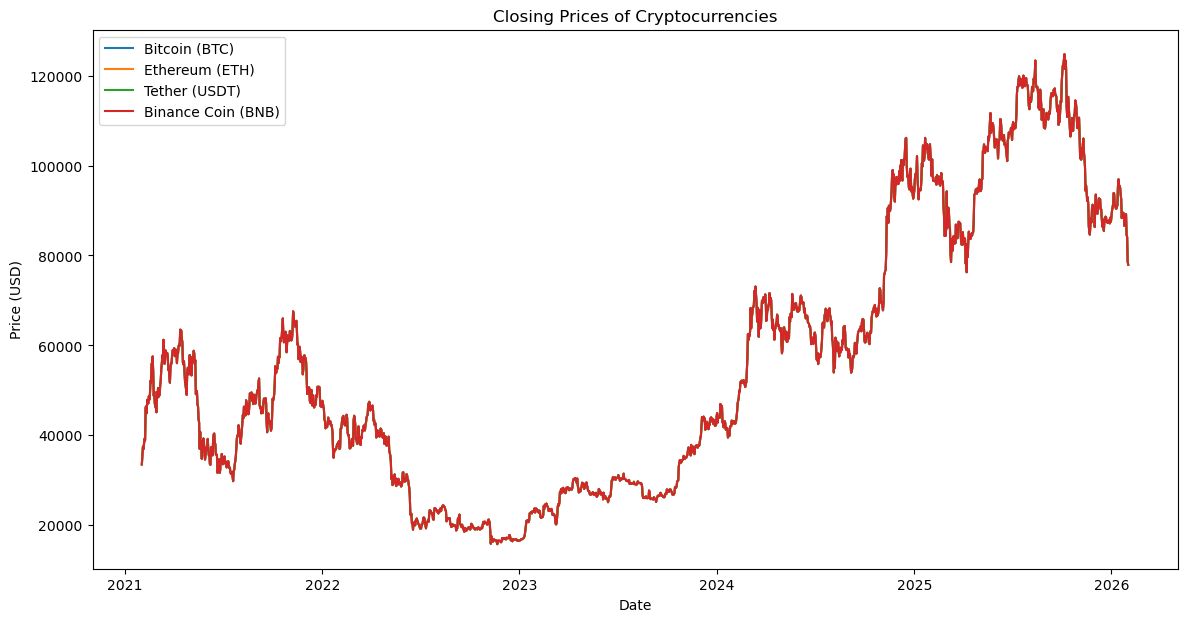

In [11]:
#Visualize the Closing Prices
# create a line plot to visualize the closing prices of all four cryptocurrencies over time:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

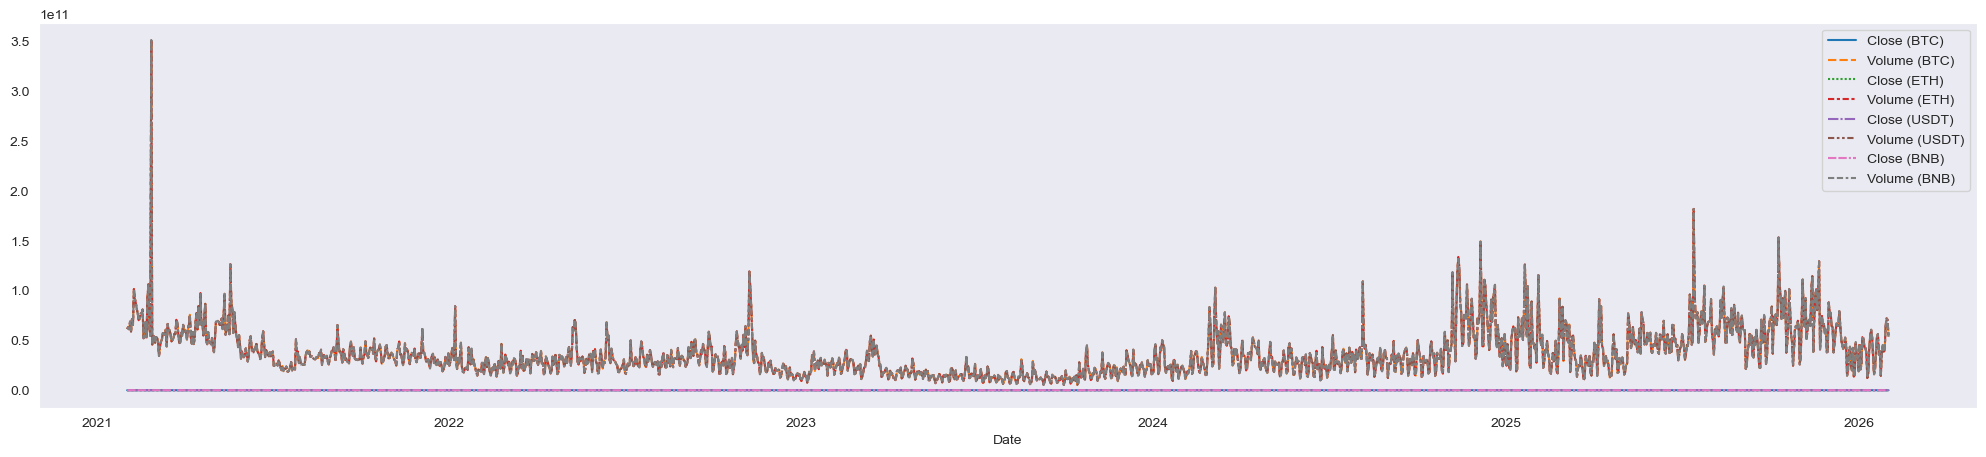

In [12]:
plt.figure(figsize = (25,5))
sns.set_style('dark')
sns.lineplot(data=data)

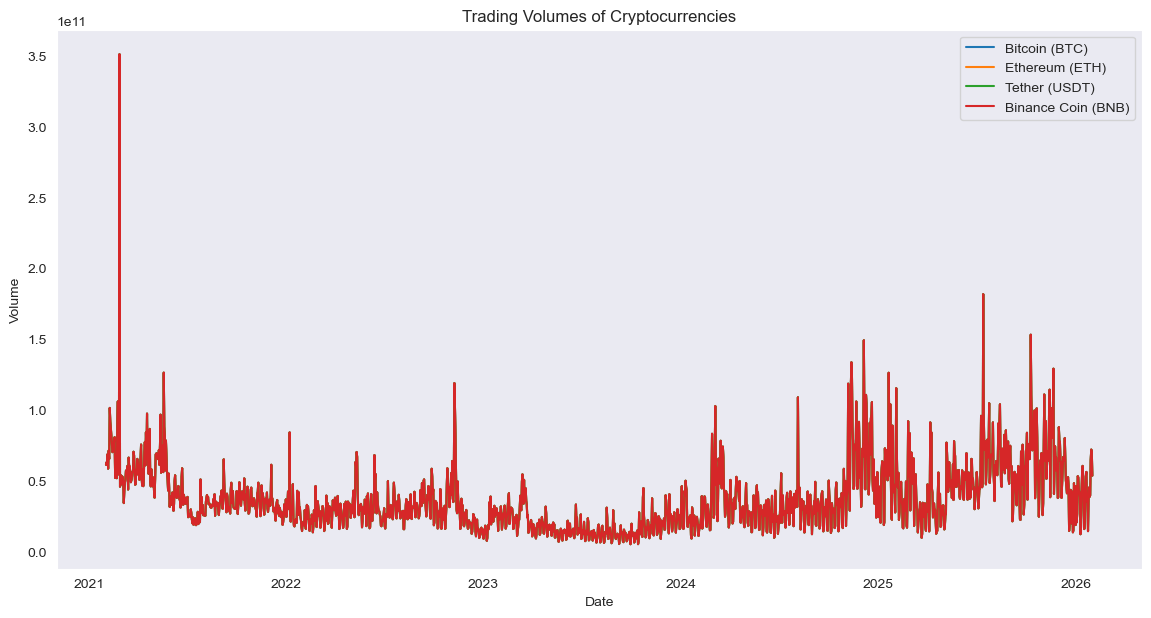

In [13]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


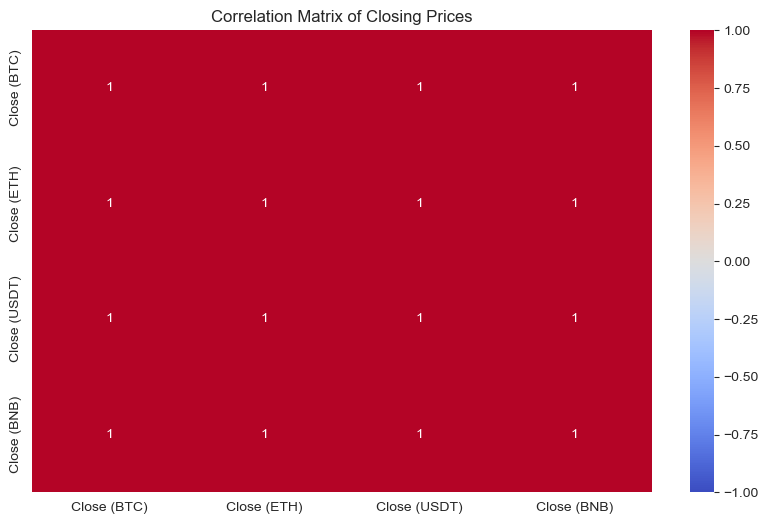

In [14]:
 #Correlation Analysis
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


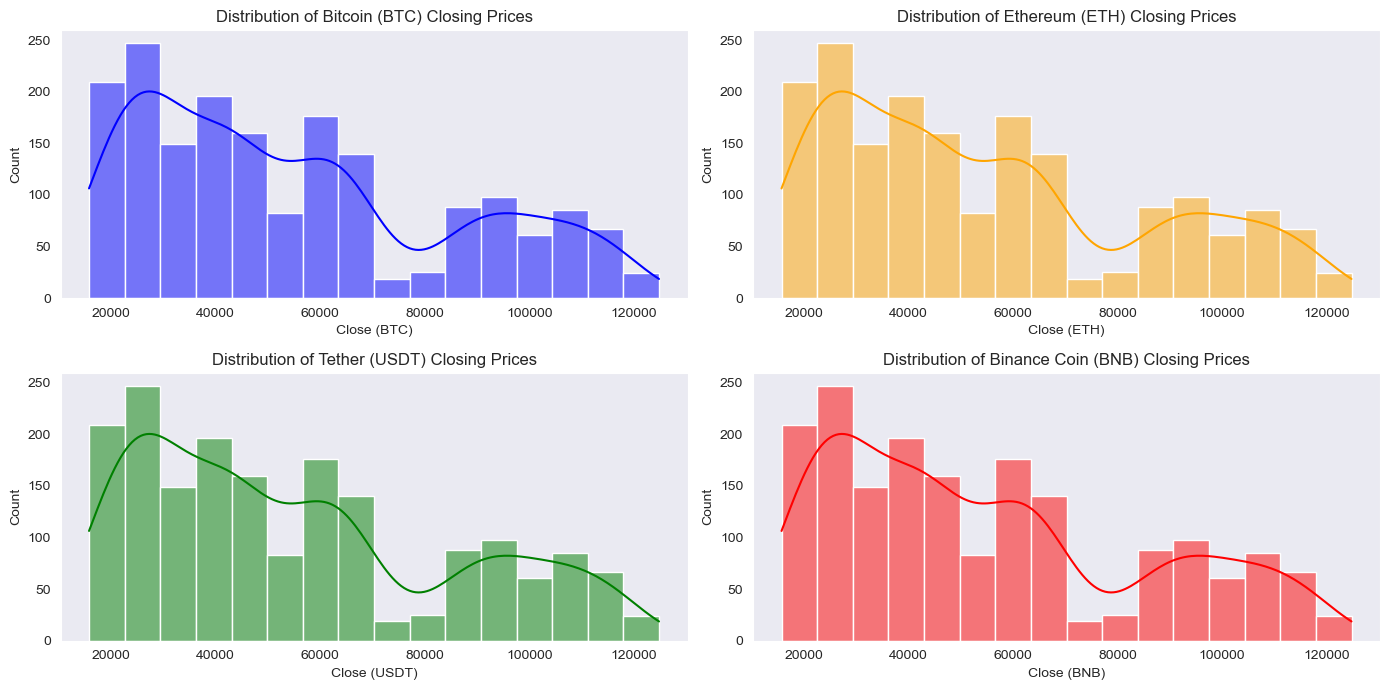

In [15]:
# Distribution of Closing Prices
#Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

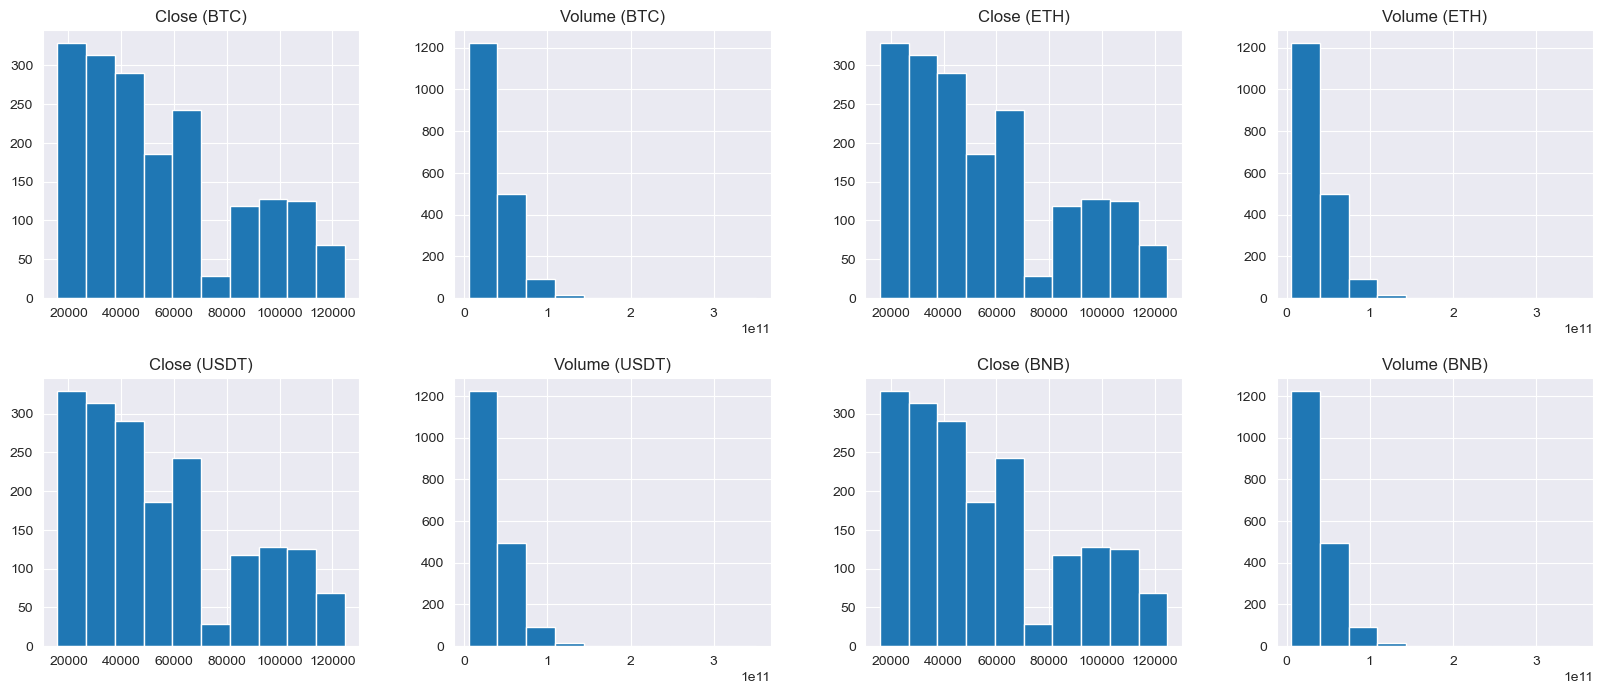

In [16]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

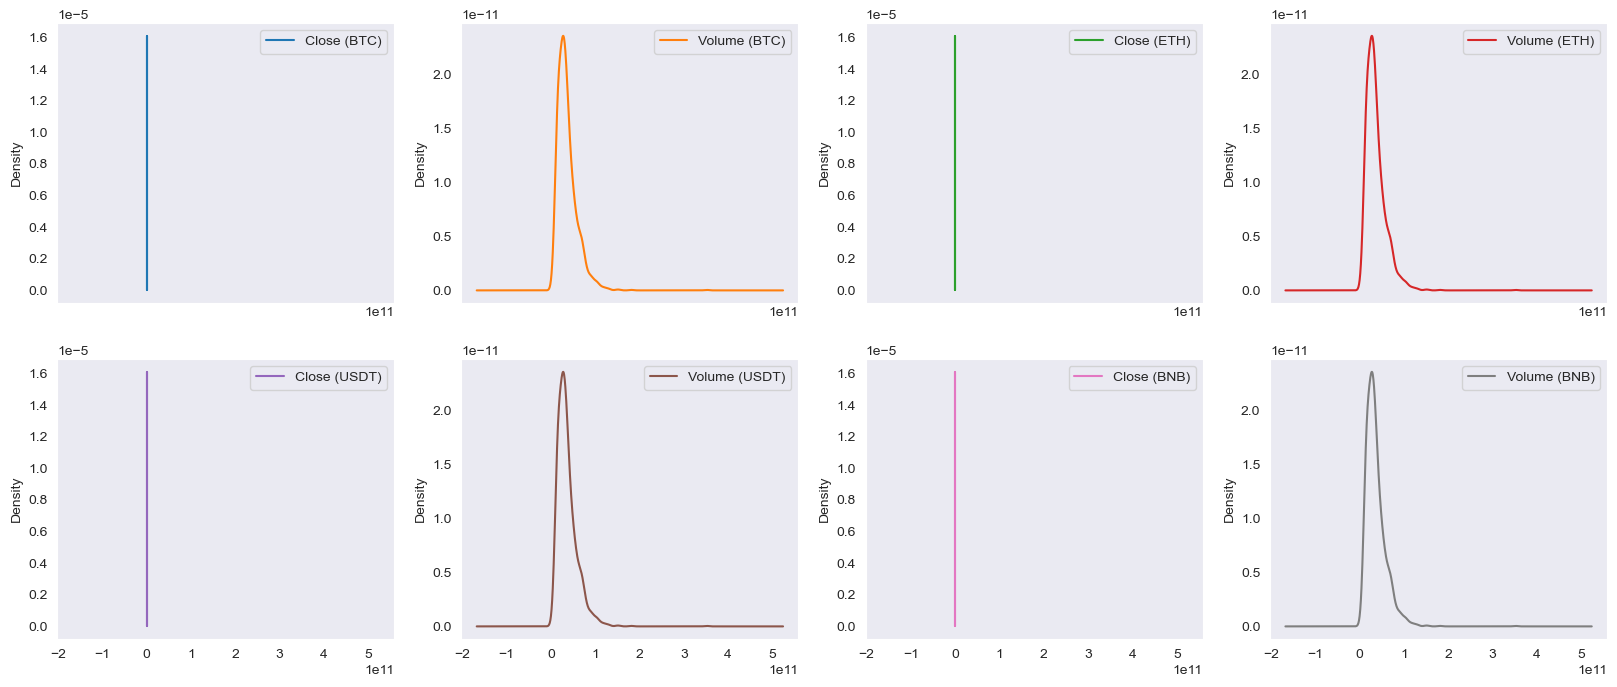

In [17]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

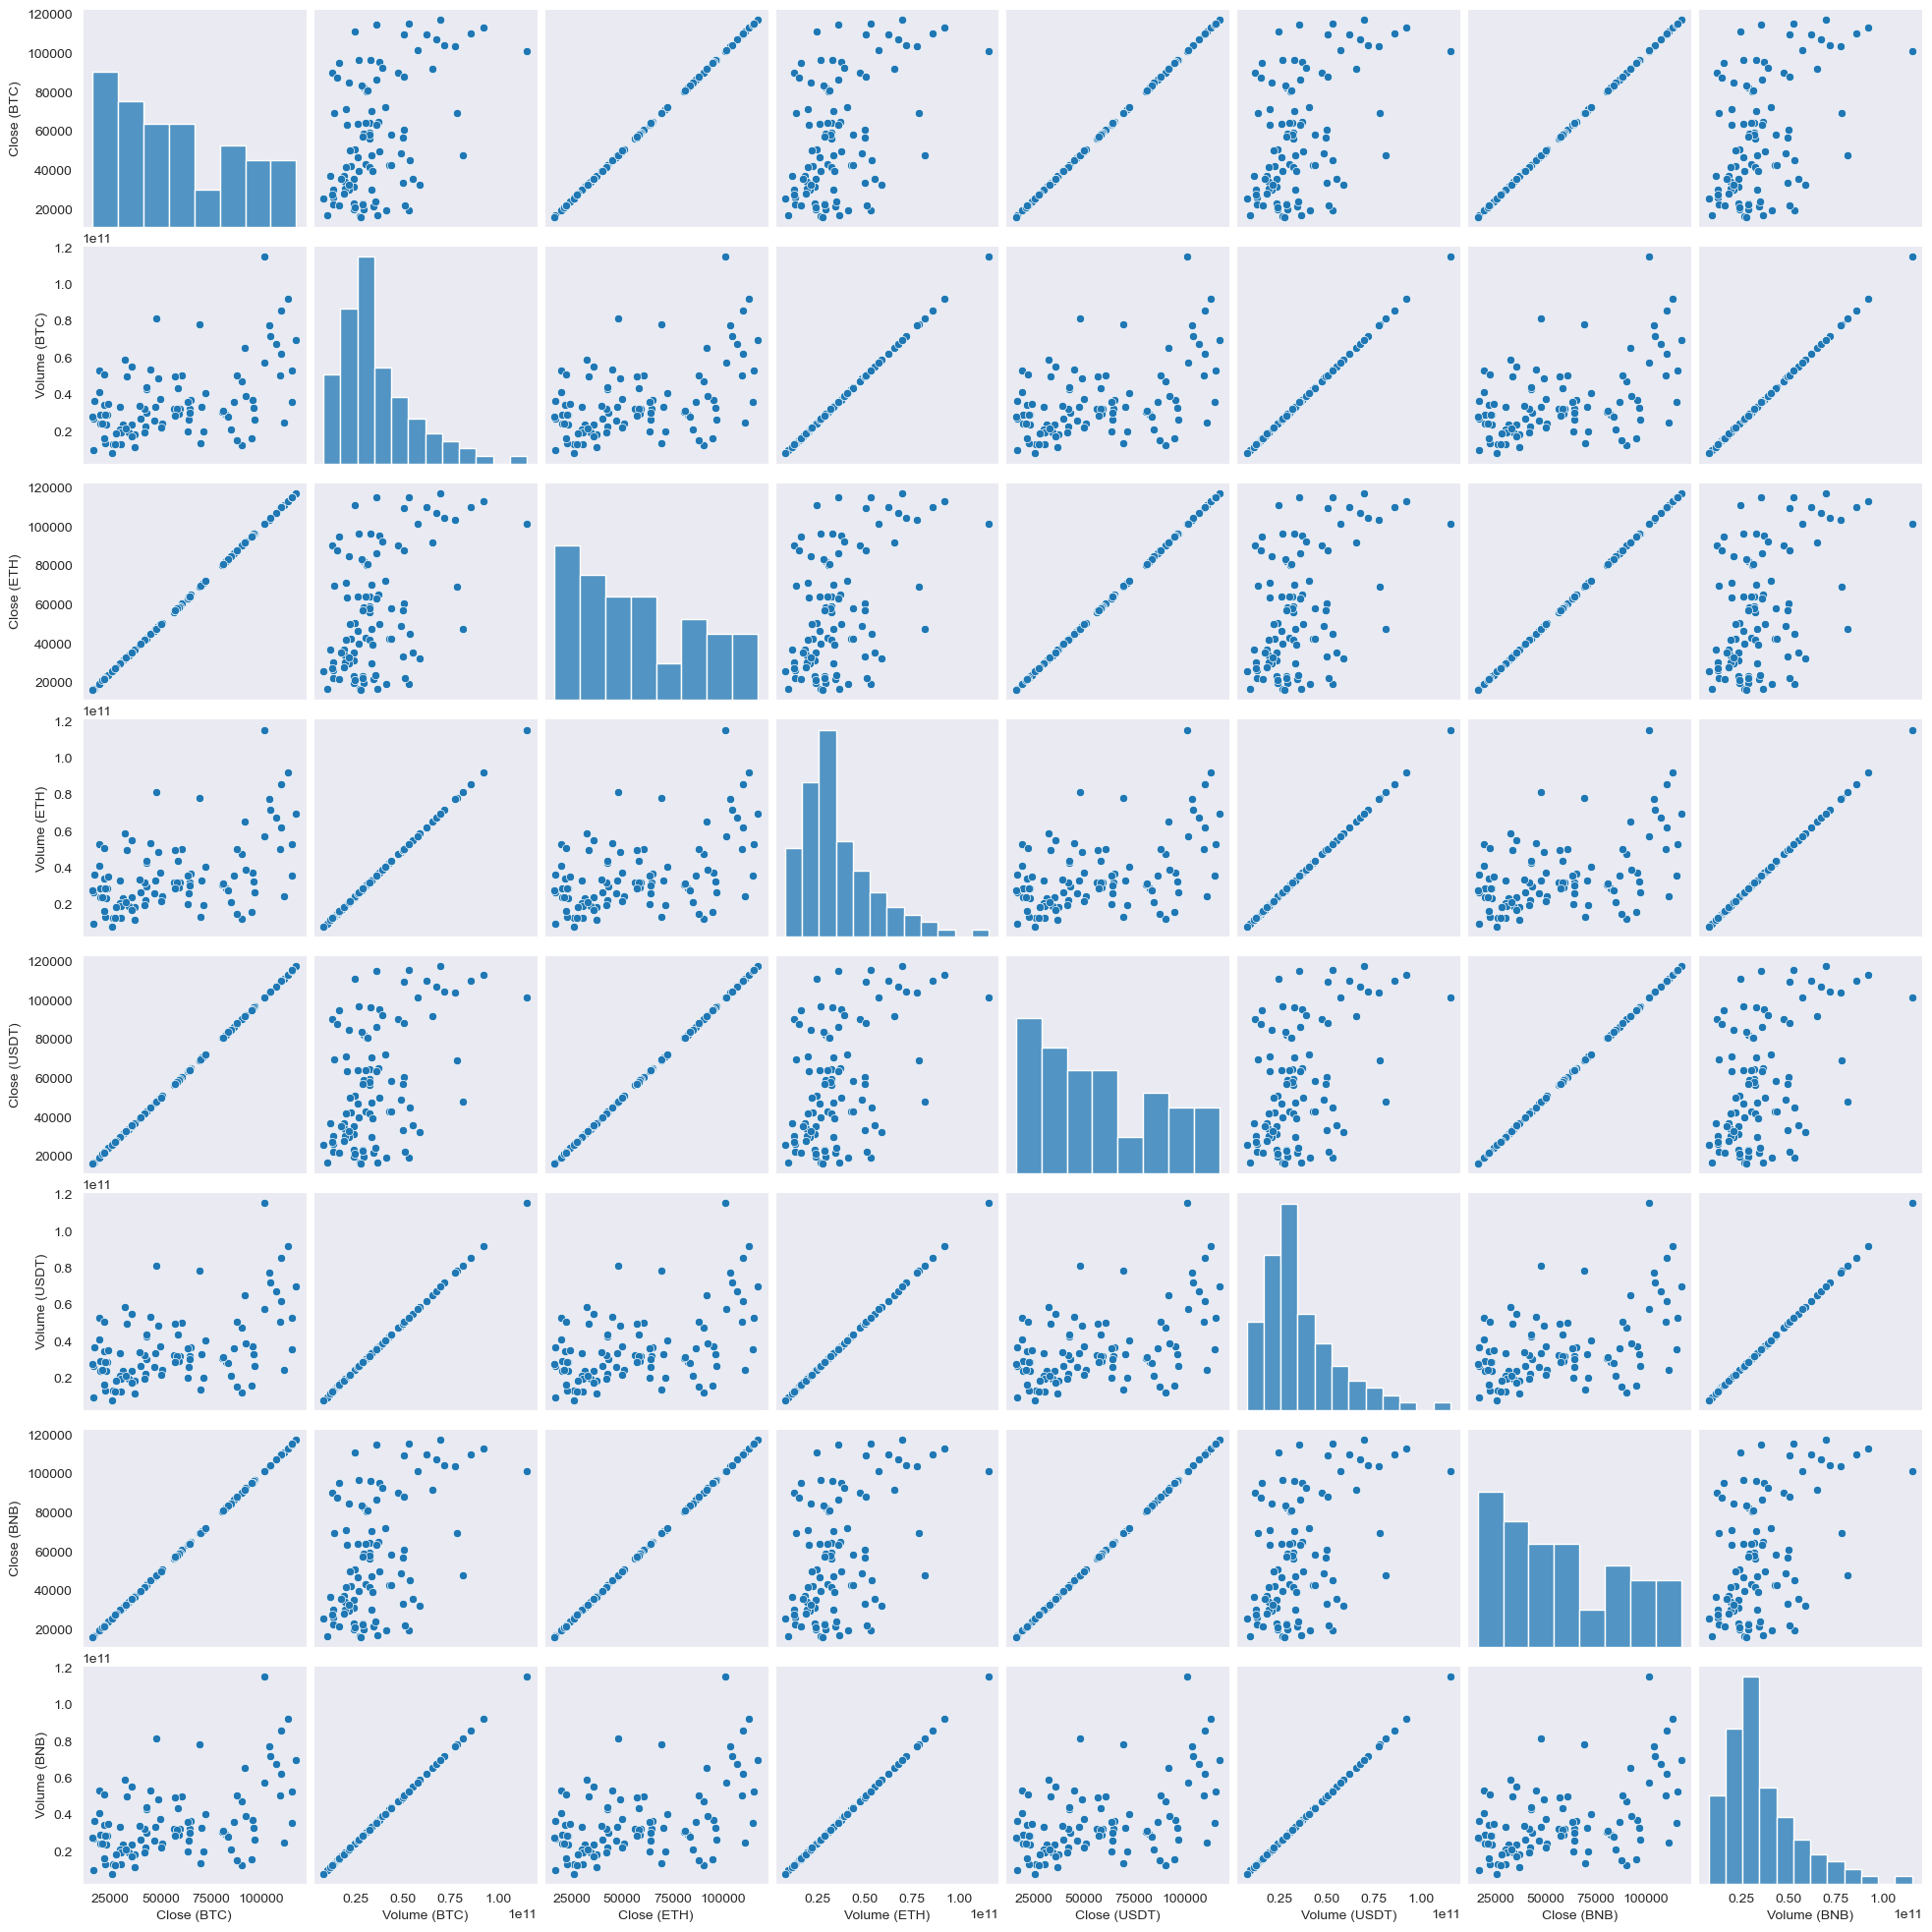

In [18]:
sns.pairplot(data.sample(n=100));

Data Pre-processing

In [19]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [20]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2021-02-01 00:00:00+00:00,61400400660,33537.175781,61400400660,33537.175781,61400400660,33537.175781,61400400660
2021-02-02 00:00:00+00:00,63088585433,35510.289062,63088585433,35510.289062,63088585433,35510.289062,63088585433
2021-02-03 00:00:00+00:00,61166818159,37472.089844,61166818159,37472.089844,61166818159,37472.089844,61166818159
2021-02-04 00:00:00+00:00,68838074392,36926.066406,68838074392,36926.066406,68838074392,36926.066406,68838074392
2021-02-05 00:00:00+00:00,58598066402,38144.308594,58598066402,38144.308594,58598066402,38144.308594,58598066402


In [21]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2026-01-28 00:00:00+00:00,39807419296,89184.570312,39807419296,89184.570312,39807419296,89184.570312,39807419296
2026-01-29 00:00:00+00:00,64653083162,84561.585938,64653083162,84561.585938,64653083162,84561.585938,64653083162
2026-01-30 00:00:00+00:00,72083816087,84128.656250,72083816087,84128.656250,72083816087,84128.656250,72083816087
2026-01-31 00:00:00+00:00,70479259159,78621.117188,70479259159,78621.117188,70479259159,78621.117188,70479259159
2026-02-01 00:00:00+00:00,53712961536,77952.429688,53712961536,77952.429688,53712961536,77952.429688,53712961536


In [22]:
Y.head()

Date
2021-02-01 00:00:00+00:00    33537.175781
2021-02-02 00:00:00+00:00    35510.289062
2021-02-03 00:00:00+00:00    37472.089844
2021-02-04 00:00:00+00:00    36926.066406
2021-02-05 00:00:00+00:00    38144.308594
Name: Close (BTC), dtype: float64

In [23]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1461, 7)
X_test shape: (366, 7)
y_train shape: (1461,)
y_test shape: (366,)


In [25]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [26]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features) 

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [27]:
X_train

array([[6.22279648e+04, 3.68568818e+10, 6.22279648e+04, 3.68568818e+10],
       [4.77833594e+04, 3.17642938e+10, 4.77833594e+04, 3.17642938e+10],
       [1.94464258e+04, 1.68372625e+10, 1.94464258e+04, 1.68372625e+10],
       ...,
       [1.20172906e+05, 7.28036580e+10, 1.20172906e+05, 7.28036580e+10],
       [2.43193340e+04, 2.29941336e+10, 2.43193340e+04, 2.29941336e+10],
       [1.67950918e+04, 1.44635818e+10, 1.67950918e+04, 1.44635818e+10]])

In [28]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:

#Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 3.757931244067411e-22
R-squared: 1.0

----- Ridge Regression -----
Mean Squared Error (MSE): 22189.258645953858
R-squared: 0.9999740758205913

----- Lasso Regression -----
Mean Squared Error (MSE): 12.868189470579875
R-squared: 0.9999999849658225

----- ElasticNet Regression -----
Mean Squared Error (MSE): 504079557.09050024
R-squared: 0.41107320966575234

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 882771772.9336702
R-squared: -0.03136090229931954

----- Decision Tree Regression -----
Mean Squared Error (MSE): 18164.328497485385
R-squared: 0.9999787782314713

----- Random Forest Regression -----
Mean Squared Error (MSE): 6800.13402507224
R-squared: 0.9999920552598317

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 43260.69616569495
R-squared: 0.9999494576152075

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 374142.14426443423
R-squared: 0.9995628818327364

-----

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


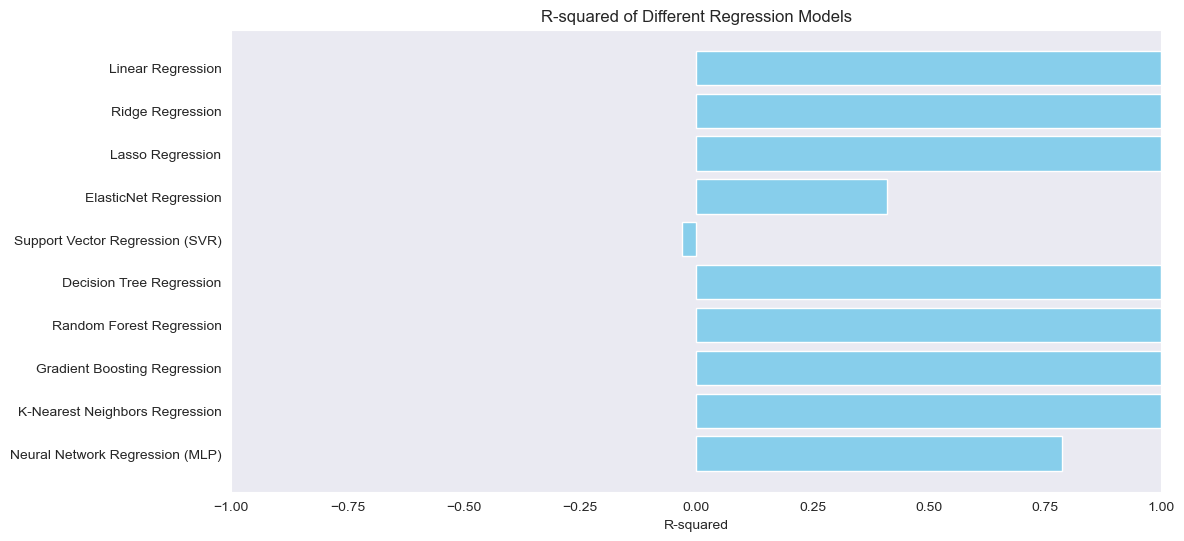

In [30]:

#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()


In [31]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train, Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Squared Error (MSE): 5689.686008173112
Loaded Random Forest Regression - R-squared: 0.9999933526196972
